## <span style="color:brown;"><center> Content Reactions Data Analysis </center></span>

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read Data

In [3]:
# Read excel file using Sheet name
content=pd.read_excel('Content Reaction.xlsx',sheet_name='Content_Reactions')

In [5]:
# Show the dataframe
content

,Column1,Content ID,Type,Datetime,User ID,Type4,Category,Sentiment,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,negative,0
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,negative,10
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,negative,15
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,negative,0
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,positive,30
...,...,...,...,...,...,...,...,...,...
24568,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,negative,10
24569,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,positive,45
24570,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,positive,30
24571,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,negative,12


#### Understand and Clean the Data

In [7]:
# See the shape of the dataframe (no. of rows and columns)
content.shape

(24573, 9)

In [9]:
# See the structure or info of dataframe
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Column1     24573 non-null  int64         
 1   Content ID  24573 non-null  object        
 2   Type        24573 non-null  object        
 3   Datetime    24573 non-null  datetime64[ns]
 4   User ID     24573 non-null  object        
 5   Type4       24573 non-null  object        
 6   Category    24573 non-null  object        
 7   Sentiment   24573 non-null  object        
 8   Score       24573 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.7+ MB


In [11]:
# See the columns name
content.columns

Index(['Column1', 'Content ID', 'Type', 'Datetime', 'User ID', 'Type4',
       'Category', 'Sentiment', 'Score'],
      dtype='object')

In [13]:
# Check the null values
content.isnull().sum()

Column1       0
Content ID    0
Type          0
Datetime      0
User ID       0
Type4         0
Category      0
Sentiment     0
Score         0
dtype: int64

In [15]:
# Check no. of unique values
content.nunique()

Column1       24573
Content ID      962
Type             16
Datetime      24562
User ID         438
Type4             4
Category         29
Sentiment         3
Score            15
dtype: int64

In [17]:
# Check the datatype of columns
content.dtypes

Column1                int64
Content ID            object
Type                  object
Datetime      datetime64[ns]
User ID               object
Type4                 object
Category              object
Sentiment             object
Score                  int64
dtype: object

In [19]:
# Check the unique values of 'Content Type'
content['Type4'].unique()

array(['photo', 'video', 'GIF', 'audio'], dtype=object)

In [21]:
# Check the unique values of 'Reaction Type'
content['Type'].unique()

array(['disgust', 'dislike', 'scared', 'interested', 'peeking', 'cherish',
       'hate', 'love', 'indifferent', 'super love', 'intrigued',
       'worried', 'like', 'heart', 'want', 'adore'], dtype=object)

In [23]:
# Check the unique values of 'Content Category'
content['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', 'Fitness', 'Veganism', 'Travel', 'Education',
       'Technology', 'Soccer', 'Culture', 'Food', 'Healthy Eating',
       'Science', 'Public Speaking'], dtype=object)

#### Here we found some values repeated i.e. Animals and animals, food and Food etc. Let's merge them.

In [25]:
# Replace values 
content.replace(to_replace=['Studying','Animals','Fitness','Veganism','Travel','Education','Technology','Soccer','Culture','Food','Healthy Eating','Science','Public Speaking'],value=['studying','animals','fitness','veganism','travel','education','technology','soccer','culture','food','healthy eating','science','public speaking'],inplace=True)

In [27]:
content.nunique()

Column1       24573
Content ID      962
Type             16
Datetime      24562
User ID         438
Type4             4
Category         16
Sentiment         3
Score            15
dtype: int64

In [29]:
# Again check the unique values in category column
content['Category'].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [31]:
# Check the unique values of 'Sentiment' column
content['Sentiment'].unique()

array(['negative', 'positive', 'neutral'], dtype=object)

In [33]:
# Check duplicate values if any
content[content.duplicated()]

,Column1,Content ID,Type,Datetime,User ID,Type4,Category,Sentiment,Score


#### So, now we have clean data without duplicates or null. Let's do Analysis

#### Analyze the Data

In [35]:
# Check statistical details of all column
content.describe(include='all')

,Column1,Content ID,Type,Datetime,User ID,Type4,Category,Sentiment,Score
count,24573.000000,24573,24573,24573,24573,24573,24573,24573,24573.000000
unique,NaN,962,16,NaN,438,4,16,3,NaN
top,NaN,5bb364a6-8646-4cdb-b1cf-09f4125718d8,heart,NaN,72d2587e-8fae-4626-a73d-352e6465ba0f,photo,animals,positive,NaN
freq,NaN,48,1622,NaN,217,6589,1897,13807,NaN
mean,12774.614821,NaN,NaN,2020-12-17 06:35:24.454278912,NaN,NaN,NaN,NaN,39.622553
min,1.000000,NaN,NaN,2020-06-18 08:07:22,NaN,NaN,NaN,NaN,0.000000
25%,6383.000000,NaN,NaN,2020-09-16 18:51:38,NaN,NaN,NaN,NaN,15.000000
50%,12775.000000,NaN,NaN,2020-12-17 06:08:30,NaN,NaN,NaN,NaN,35.000000
75%,19168.000000,NaN,NaN,2021-03-17 12:05:06,NaN,NaN,NaN,NaN,65.000000
max,25552.000000,NaN,NaN,2021-06-18 08:30:29,NaN,NaN,NaN,NaN,75.000000


In [37]:
# Check no. of negative reaction
content[content.Sentiment=='negative'].value_counts().sum()

7695

In [39]:
# Check no. of positive reaction
content[content.Sentiment=='positive'].value_counts().sum()

13807

In [41]:
# Check no. of negative reaction on photo
content[(content.Type4=='photo') & (content.Sentiment=='negative')].value_counts().sum()

2057

In [43]:
# Check no. of positive reaction on photo
content[(content.Type4=='photo') & (content.Sentiment=='positive')].value_counts().sum()

3700

In [45]:
# Total score value
content.Score.sum()

973645

In [47]:
# Total score categorized by Content type
c=content.groupby(by='Type4').Score.sum()
c.sort_values(ascending=False)

Type4
photo    262838
video    246463
GIF      238217
audio    226127
Name: Score, dtype: int64

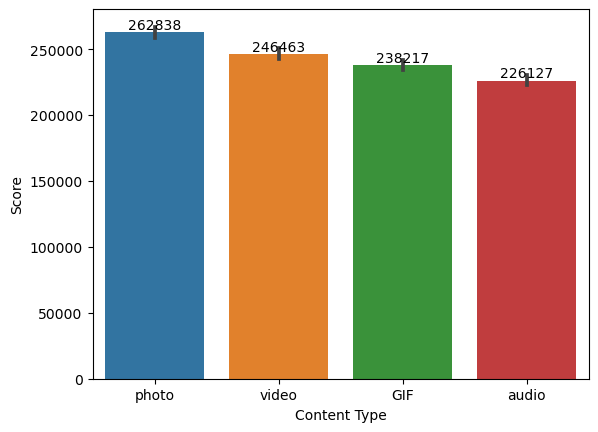

In [49]:
# Create barplot to see visual form
ab=sns.barplot(content,x='Type4',y='Score',estimator='sum')
for i in ab.containers:
    ab.bar_label(i,)
plt.xlabel('Content Type')
plt.show()

#### Here we found maximum people reacts on photo content

In [51]:
# Total score categorized by Reaction sentiment
c=content.groupby(by='Sentiment').Score.sum()
c.sort_values(ascending=False)

Sentiment
positive    824056
neutral      84805
negative     64784
Name: Score, dtype: int64

In [53]:
# Check the percent ratio of Sentiment and Score
a=content.groupby(by='Sentiment').Score.sum()
a=a.sort_values(ascending=False)
b=content.Score.sum()
((a/b)*100).round(2)

Sentiment
positive    84.64
neutral      8.71
negative     6.65
Name: Score, dtype: float64

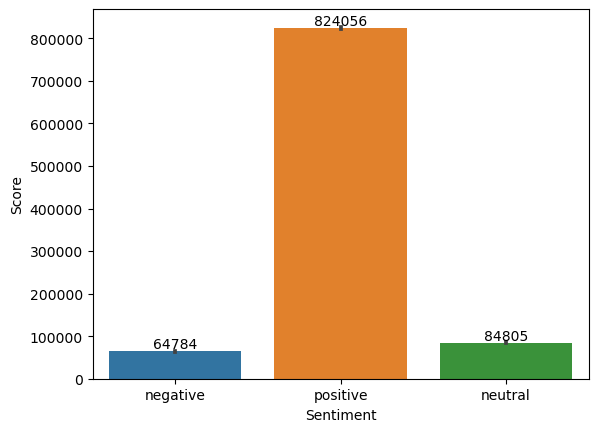

In [55]:
# Create visual or barplot
ad=sns.barplot(content,x='Sentiment',y='Score',estimator='sum')
for i in ad.containers:
    ad.bar_label(i,)

#### Result says that most of the people reaction sentiment is Positive.

In [57]:
# Total score categorized by Content Category
a=content.groupby(by='Category').Score.sum()
a.sort_values(ascending=False)

Category
animals            74965
science            71168
healthy eating     69339
technology         68738
food               66676
culture            66579
travel             64880
cooking            64756
soccer             57783
education          57436
fitness            55323
studying           54269
dogs               52511
tennis             50339
veganism           49619
public speaking    49264
Name: Score, dtype: int64

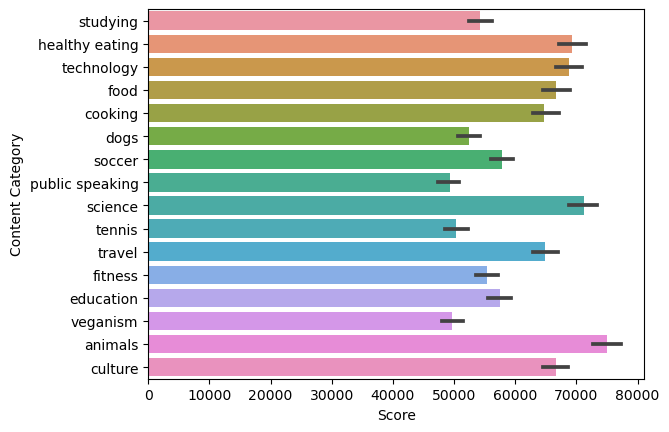

In [59]:
# Create bar plot to see visual form
sns.barplot(content,x='Score',y='Category',estimator='sum')
plt.ylabel('Content Category')
plt.show()

#### Result says top 3 Categories are Animals, Science, Healthy Eating.

In [61]:
# See the data again for more analysis
content.head()

,Column1,Content ID,Type,Datetime,User ID,Type4,Category,Sentiment,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,10
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,15
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,positive,30


In [63]:
# Extract year from content "Datetime" column of the dataframe
content['Year']=content['Datetime'].dt.year

In [65]:
# Extract month from content dataframe
content['Month']=content['Datetime'].dt.month

In [67]:
# Extract time from content dataframe
content['Time']=content['Datetime'].dt.time

In [69]:
# See the dataframe with new extracted columns
content.head()

,Column1,Content ID,Type,Datetime,User ID,Type4,Category,Sentiment,Score,Year,Month,Time
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0,2020,11,09:43:50
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,10,2021,6,12:22:51
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,15,2021,4,05:13:58
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0,2021,1,19:13:01
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,positive,30,2020,8,12:25:58


In [71]:
# Total no. of Reactions by Year
print('2020: ',content[content.Year==2020].value_counts().sum())
print('2021: ',content[content.Year==2021].value_counts().sum())

2020:  13280
2021:  11293


In [73]:
# Total Score categorized by Year
content.groupby(by='Year').Score.sum()

Year
2020    526429
2021    447216
Name: Score, dtype: int64

#### Here we found, 2020 score is more than 2021 score. Let's check using sentiments

In [75]:
# Total score categorized by Year and Sentiments
content.pivot_table(index=['Year','Sentiment'],values='Score',aggfunc='sum')

Score
Year Sentiment        
2020 negative    34894
     neutral     45990
     positive   445545
2021 negative    29890
     neutral     38815
     positive   378511

#### Here we found in 2021 score is low in all Sentiments in comparison with 2020.

In [77]:
# Check no. or Reactions by Months
print('No. of Reactions: ',content['Month'].value_counts().values)
print('Months: ',content['Month'].value_counts().index)
# result shows that May (5) has maximum no. of reactions follwed by Jan (1).

No. of Reactions:  [2138 2126 2114 2092 2070 2056 2034 2022 2021 2012 1974 1914]
Months:  Index([5, 1, 8, 12, 7, 10, 11, 9, 6, 3, 4, 2], dtype='int32', name='Month')


In [79]:
# Total score categorized by Year & Month
content.pivot_table(index=['Year','Month'],values='Score',aggfunc='sum')

Score
Year Month       
2020 6      35406
     7      82464
     8      82176
     9      80077
     10     82810
     11     82333
     12     81163
2021 1      82938
     2      75509
     3      78915
     4      78598
     5      86293
     6      44963

#### Result says that top scorer Months are May (5) 2021 and Jan (1) in 2021, June in 2021 & 2020 is the least scorer.

In [81]:
# Total score categorized by Year and Content Type
content.pivot_table(index=['Year','Type4'],values='Score',aggfunc='sum')

Score
Year Type4        
2020 GIF    126928
     audio  121161
     photo  142790
     video  135550
2021 GIF    111289
     audio  104966
     photo  120048
     video  110913

In [83]:
# Total score categorized by Year, Month & Content Type
content.pivot_table(index=['Year','Month','Type4'],values='Score',aggfunc='sum')

Score
Year Month Type4       
2020 6     GIF     9083
           audio   7923
           photo   9816
           video   8584
     7     GIF    19810
           audio  19089
           photo  23239
           video  20326
     8     GIF    18602
           audio  19579
           photo  21378
           video  22617
     9     GIF    18989
           audio  17627
           photo  21594
           video  21867
     10    GIF    21428
           audio  18904
           photo  21333
           video  21145
     11    GIF    20284
           audio  19601
           photo  22165
           video  20283
     12    GIF    18732
           audio  18438
           photo  23265
           video  20728
2021 1     GIF    20186
           audio  20310
           photo  22193
           video  20249
     2     GIF    18555
           audio  17614
           photo  20028
           video  19312
     3     GIF    19872
           audio  18621
           photo  20660
           video  19762
     4     GIF    19289
           audio  17978
           photo  22856
           video  18475
     5     GIF    22207
           audio  20202
           photo  22050
           video  21834
     6     GIF    11180
           audio  10241
           photo  12261
           video  11281

#### Here we found Photo score is Maximum in most of the Months except Aug, Sep in 2020 (in these months Video score is Maximum) and May in 2021 (in this month Gif score is Maximum).

In [85]:
# Total score categorized by Year, Sentiment
content.pivot_table(index=['Year','Sentiment'],values='Score',aggfunc='sum')

Score
Year Sentiment        
2020 negative    34894
     neutral     45990
     positive   445545
2021 negative    29890
     neutral     38815
     positive   378511

In [87]:
# Total score categorized by Year, Sentiment and Reaction Type
content.pivot_table(index=['Year','Sentiment','Type'],values='Score',aggfunc='sum')

Score
Year Sentiment Type              
2020 negative  disgust          0
               dislike       8340
               hate          4195
               scared       12735
               worried       9624
     neutral   indifferent  16660
               peeking      29330
     positive  adore        61560
               cherish      56700
               heart        51540
               interested   24690
               intrigued    35010
               like         41050
               love         55250
               super love   62625
               want         57120
2021 negative  disgust          0
               dislike       7140
               hate          3565
               scared       10845
               worried       8340
     neutral   indifferent  13580
               peeking      25235
     positive  adore        49896
               cherish      48370
               heart        45780
               interested   21780
               intrigued    31365
               like         34950
               love         44460
               super love   51300
               want         50610

#### Result says that in both years Scared score is Maximum in Negative sentiment, Peeking score is Maximum in Neutral sentiment & Super love score is Maximum in Positive sentiment.

In [89]:
# Set total no. of visible rows 
pd.set_option('display.max_rows',200)

In [91]:
# Total score categorized by Year, Sentiment and Content Category
content.pivot_table(index=['Year','Sentiment','Category'],values='Score',aggfunc='sum')

Score
Year Sentiment Category              
2020 negative  animals           2845
               cooking           2538
               culture           2340
               dogs              1816
               education         1945
               fitness           2001
               food              2326
               healthy eating    2357
               public speaking   1647
               science           2504
               soccer            1931
               studying          2047
               technology        2187
               tennis            1958
               travel            2519
               veganism          1933
     neutral   animals           3405
               cooking           2630
               culture           2945
               dogs              2835
               education         2840
               fitness           2660
               food              3155
               healthy eating    3610
               public speaking   1915
               science           3485
               soccer            2695
               studying          2930
               technology        2840
               tennis            2380
               travel            3005
               veganism          2660
     positive  animals          33696
               cooking          29994
               culture          29896
               dogs             24149
               education        24675
               fitness          25616
               food             30150
               healthy eating   32413
               public speaking  23617
               science          33226
               soccer           27224
               studying         24070
               technology       30795
               tennis           23615
               travel           29529
               veganism         22880
2021 negative  animals           2377
               cooking           2156
               culture           2229
               dogs              1538
               education         1725
               fitness           1740
               food              2099
               healthy eating    1898
               public speaking   1515
               science           2058
               soccer            1783
               studying          1664
               technology        1903
               tennis            1785
               travel            1951
               veganism          1469
     neutral   animals           3110
               cooking           2525
               culture           2740
               dogs              2245
               education         2405
               fitness           1990
               food              2810
               healthy eating    2190
               public speaking   1900
               science           2875
               soccer            2565
               studying          1865
               technology        3180
               tennis            2000
               travel            2400
               veganism          2015
     positive  animals          29532
               cooking          24913
               culture          26429
               dogs             19928
               education        23846
               fitness          21316
               food             26136
               healthy eating   26871
               public speaking  18670
               science          27020
               soccer           21585
               studying         21693
               technology       27833
               tennis           18601
               travel           25476
               veganism         18662

#### Result says in 2020 Animals score is Maximum in Negative and Positive Sentiment but in Neutral Sentiment Healthy eating score is Maximum. and in 2021 again Animals score is Maximum in Negative and Positive sentiment but in Neutral Technology score is Maximum.

In [93]:
# Total score by time
a=content.pivot_table(index=['Time'],values=['Score'],aggfunc='sum')
a.sort_values(by='Score',ascending=False)

,Score
Time,
06:42:55,235
22:16:36,207
20:13:01,207
05:20:29,207
22:17:35,204
...,...
19:07:37,0
08:38:34,0
14:36:36,0


#### Here we found Total score is Maximum in 5 to 7 in the Morning and 8 to 11 in the Evening.

## Conclusion:
(This data is for June/2020 to June/2021)

1. Most reactions have been given to Photo Content.
2. Maximum reaction sentiment score is Positive (with 84.64%).
3. Most reactions have been given in May followed by January.
4. Reaction score in 2021 is less in comparison with 2020.
5. Animal content has the highest scores, which means people love animal related contents, followed by Science and Healthy eating, with technology in fourth place.
6. The maximum reaction score is between 5 to 7 in the Morning and 8 to 11 in the Evening.